In [1]:
import imageio as img
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Работа с изображениями

In [3]:
image = misc.face()

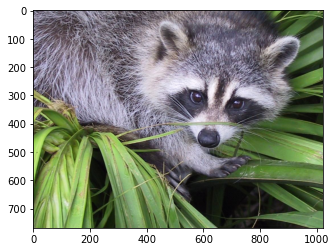

In [4]:
plt.imshow(image);

In [ ]:
# RGB - Red Green Blue

In [5]:
image.shape  

(768, 1024, 3)

In [6]:
type(image)

numpy.ndarray

In [7]:
image[:2, :2]

array([[[121, 112, 131],
        [138, 129, 148]],

       [[ 89,  82, 100],
        [110, 103, 121]]], dtype=uint8)

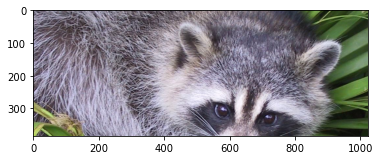

In [8]:
plt.imshow(image[:384]);

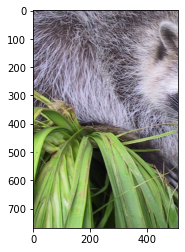

In [9]:
plt.imshow(image[:, :512])

In [10]:
1 - image

array([[[136, 145, 126],
        [119, 128, 109],
        [104, 113,  92],
        ...,
        [138, 131, 183],
        [126, 121, 175],
        [118, 113, 167]],

       [[168, 175, 157],
        [147, 154, 136],
        [127, 135, 114],
        ...,
        [139, 132, 186],
        [123, 116, 170],
        [111, 104, 158]],

       [[184, 191, 173],
        [163, 170, 152],
        [142, 149, 131],
        ...,
        [140, 131, 186],
        [124, 115, 170],
        [113, 104, 159]],

       ...,

       [[170, 151, 181],
        [163, 147, 176],
        [150, 133, 165],
        ...,
        [137,  99, 160],
        [138, 100, 161],
        [138,  99, 162]],

       [[172, 156, 185],
        [162, 146, 175],
        [145, 130, 161],
        ...,
        [136, 100, 161],
        [137, 101, 163],
        [137, 101, 163]],

       [[172, 156, 183],
        [160, 144, 173],
        [146, 131, 160],
        ...,
        [137, 101, 162],
        [138, 102, 164],
        [139, 103, 165]]

(-0.5, 1023.5, 767.5, -0.5)

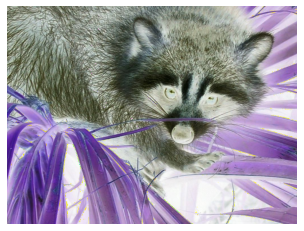

In [11]:
plt.imshow(1 - image) # Получить негатив изображения
plt.axis('off')

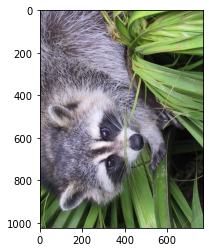

In [14]:
rotate_img = np.transpose(image, (1, 0, 2))
# plt.figure(num=None, figsize=(15, 15))
plt.imshow(rotate_img)

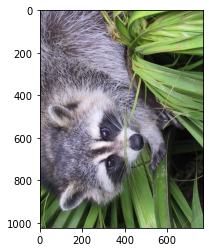

In [15]:
plt.imshow(np.swapaxes(image, 0, 1))

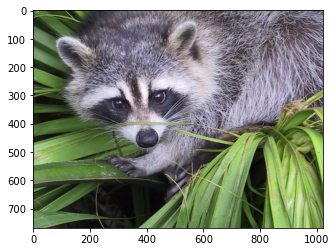

In [17]:
plt.imshow(image[:, ::-1])

In [19]:
image_ch = image.reshape(image.shape[0] // 2, 2, image.shape[1] // 2, 2, -1)
image_ch.shape

(384, 2, 512, 2, 3)

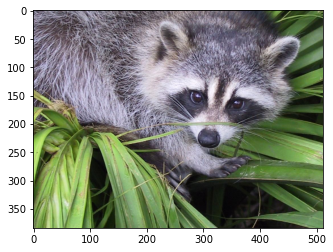

In [20]:
plt.imshow(image_ch[:,0,:,0])

In [21]:
image_ch_h = np.hstack((image_ch[:, 0, :, 0], image_ch[:, 0, :, 1]))
image_ch_v = np.vstack((image_ch[:, 0, :, 0], image_ch[:, 1, :, 0]))

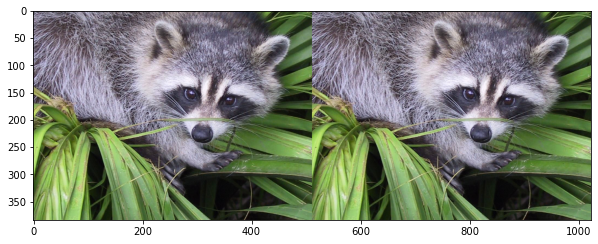

In [22]:
plt.figure(num=None, figsize=(10, 10))
plt.imshow(image_ch_h)

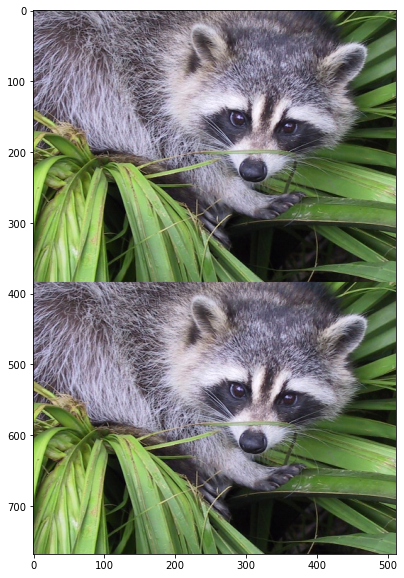

In [16]:
plt.figure(num=None, figsize=(10, 10))
plt.imshow(image_ch_v)

In [22]:
image_ch_1 = image_ch[:, 0, :, 0]
image_ch_2 = np.repeat(image_ch_1, 2) # склонировали данные
image_ch_3 = image_ch_2.reshape(image_ch_1.shape[0], image_ch_1.shape[1], image_ch_1.shape[2], -1)
image_ch_4 = np.transpose(image_ch_3, (0, 3, 1, 2)) # поменяли порядок осей
image_ch_5 = image_ch_4.reshape(-1, image_ch_1.shape[1], image_ch_1.shape[2]) # объединили оси

In [23]:
for i in range(1,6):
    print(f'image_ch_{i}', vars()['image_ch_' + str(i)].shape)

image_ch_1 (384, 512, 3)
image_ch_2 (1179648,)
image_ch_3 (384, 512, 3, 2)
image_ch_4 (384, 2, 512, 3)
image_ch_5 (768, 512, 3)


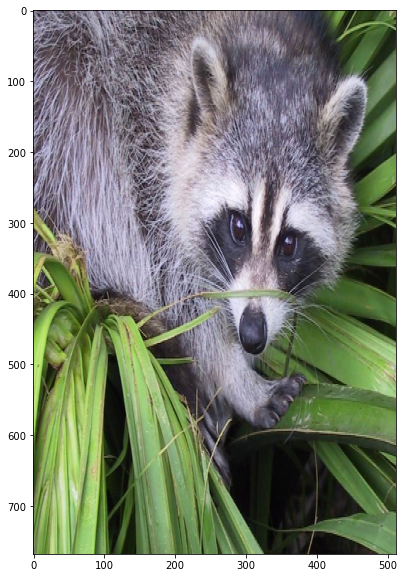

In [24]:
plt.figure(num=None, figsize=(10, 10))
plt.imshow(image_ch_5)

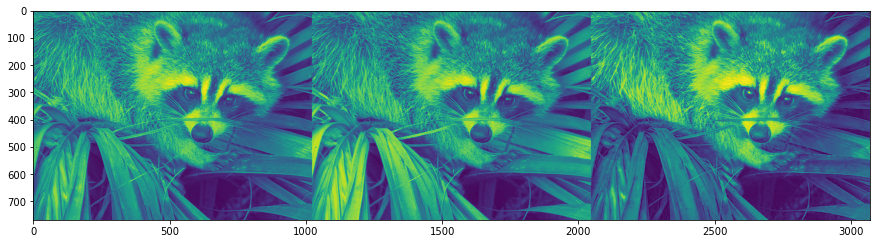

In [23]:
red_array = image[:, :, 0]
green_array = image[:, :, 1]
blue_array = image[:, :, 2]
plt.figure(num=None, figsize=(15, 15))
plt.imshow(np.hstack((red_array, green_array, blue_array)))

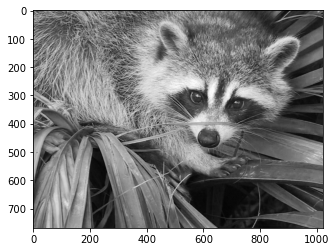

In [24]:
image_grey = image[:, :, 0]
plt.imshow(image_grey, cmap='gray')

In [25]:
image_grey = image_grey.copy()
image_grey.shape

(768, 1024)

In [26]:
a, b = np.ogrid[0:10, 0:5]
a, b

(array([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]]),
 array([[0, 1, 2, 3, 4]]))

In [27]:
a + b

array([[ 0,  1,  2,  3,  4],
       [ 1,  2,  3,  4,  5],
       [ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10],
       [ 7,  8,  9, 10, 11],
       [ 8,  9, 10, 11, 12],
       [ 9, 10, 11, 12, 13]])

In [35]:
lx, ly = image_grey.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
image_grey[mask] = 0

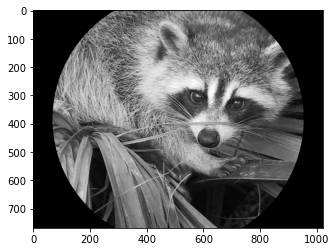

In [37]:
plt.imshow(image_grey, cmap='gray')

In [38]:
mask[360: 370, 100: 120]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False],
       [Fa